In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors
import imageio
import math

from TheGrittyDetails.sh import *

%matplotlib notebook
def plot_views(save_path, rows, cols, pts, w):
    colormap = plt.get_cmap("gray")
    norm = matplotlib.colors.Normalize(vmin=np.min(w), vmax=np.max(w))
    L = 1.5
    
    fig = plt.figure(figsize=(cols*3, rows*3))
    for r in range(rows):
        for c in range(cols):
            i = r*cols + c
            ax = fig.add_subplot(rows, cols, i+1, projection='3d')
            ax.scatter(pts[:,0], pts[:,1], pts[:,2], c=colormap(norm(w)), s=10)
            ax.plot([0, L], [0, 0], [0, 0], c='r', linewidth=2)
            ax.plot([0, 0], [0, L], [0, 0], c='g', linewidth=2)
            ax.plot([0, 0], [0, 0], [0, L], c='b', linewidth=2)
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            ax.set_title('view {}'.format(i+1))
            ax.view_init(elev=45-90*r, azim=30*(2*i+1))

    plt.savefig(save_path, dpi=150)
    plt.close('all')

    saved_plot = imageio.imread(save_path)
    fig = plt.figure(figsize=(8, 4))
    plt.imshow(saved_plot)
    plt.axis(False)
    plt.show()
    
    return saved_plot

def plot_interactive_sphere(vecs, w):
    %matplotlib notebook
    colormap = plt.get_cmap("gray")
    norm = matplotlib.colors.Normalize(vmin=np.min(w), vmax=np.max(w))
    L = 1.5
    
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(vecs[:,0], vecs[:,1], vecs[:,2], c=colormap(norm(w)), s=5)
    ax.plot([0, L], [0, 0], [0, 0], c='r', linewidth=2)
    ax.plot([0, 0], [0, L], [0, 0], c='g', linewidth=2)
    ax.plot([0, 0], [0, 0], [0, L], c='b', linewidth=2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    
def plot_interactive(samples, w):
    thetas = []
    phis = []
    for s in samples:
        thetas.append(s.sph[0])
        phis.append(s.sph[1])

    vecs = []
    for i in range(len(w)):
        theta = thetas[i]
        phi = phis[i]
        r = w[i]
        vec = np.float32([r*math.sin(theta)*math.cos(phi), r*math.sin(theta)*math.sin(phi), r*math.cos(theta)])
        vecs.append(vec)
    vecs = np.float32(vecs)
    
    L = 1.5
    
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(vecs[:,0], vecs[:,1], vecs[:,2], s=5)
    ax.plot([0, L], [0, 0], [0, 0], c='r', linewidth=2)
    ax.plot([0, 0], [0, L], [0, 0], c='g', linewidth=2)
    ax.plot([0, 0], [0, 0], [0, L], c='b', linewidth=2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

In [2]:
sqrt_n_samples = 100
n_bands = 4
samples = SH_setup_spherical_samples(sqrt_n_samples, n_bands)

loops: 10000
 0 100 200 300 400 500 600 700 800 900 1000
 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000
 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000
 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000
 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000
 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000
 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000
 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000
 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000
 9100 9200 9300 9400 9500 9600 9700 9800 9900

(10000, 3)
(10000, 3)


<IPython.core.display.Javascript object>


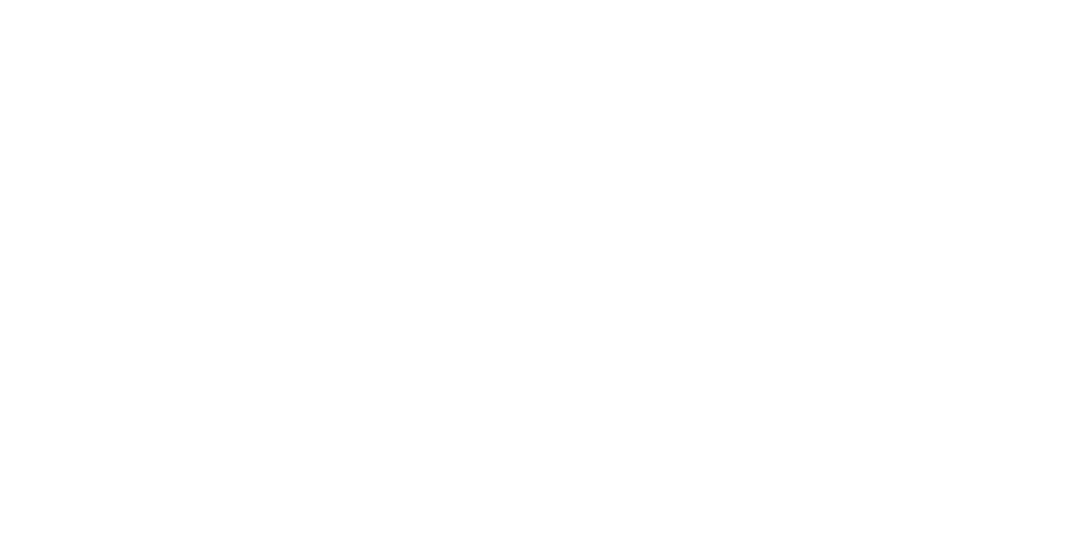

<IPython.core.display.Javascript object>


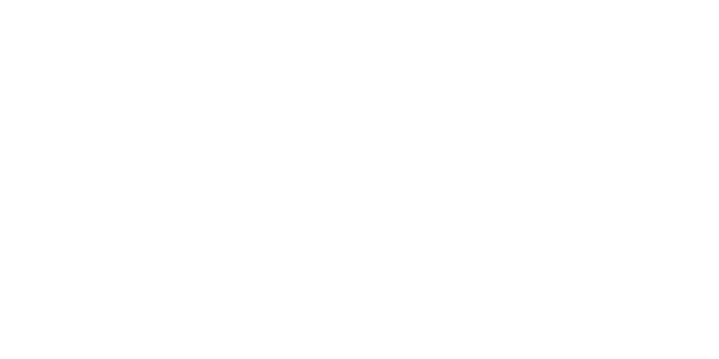

In [3]:
vecs = []
sphs = []
for s in samples:
    vecs.append(s.vec)
    sphs.append(s.sph)
vecs = np.float32(vecs)
sphs = np.float32(sphs)

print(vecs.shape)
print(sphs.shape)

out_dir = './2_data/output/plots.png'
plot = plot_views(out_dir, 2, 4, vecs, vecs[:,2])

# Example: light function to project & reconstruct using SH

### light function

In [4]:
def light_polar_fn_example(theta, phi):
    L = max(0, 5*math.cos(theta) - 4) + max(0, -4*math.sin(theta-np.pi)*math.cos(phi-2.5)-3)
#     L = max(0, math.cos(theta)) + max(0, math.sin(phi - 2.5))
    return L

light_fn = light_polar_fn_example
f_true = np.zeros(len(samples)).astype(np.float32)
for sample_idx, sample in enumerate(samples):
    theta = sample.sph[0]
    phi = sample.sph[1]
    f_true[sample_idx] = light_fn(theta, phi)
print(f_true.shape)

(10000,)


<IPython.core.display.Javascript object>


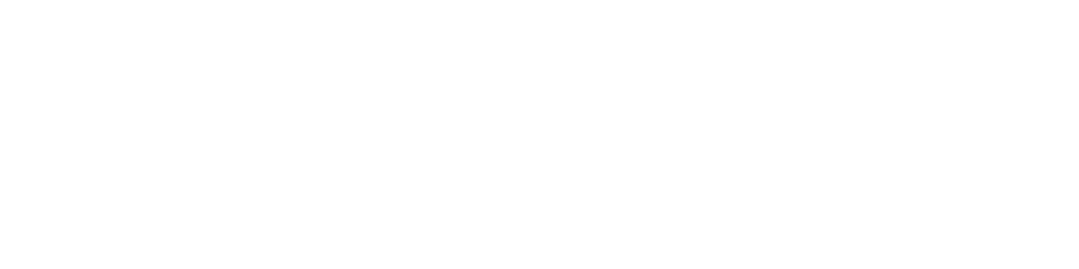

<IPython.core.display.Javascript object>


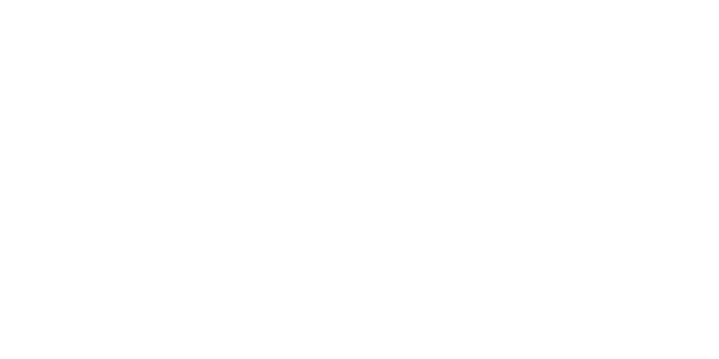

In [5]:
out_dir = './2_data/output/plots.png'
plot = plot_views(out_dir, 1, 4, vecs, f_true)

<IPython.core.display.Javascript object>


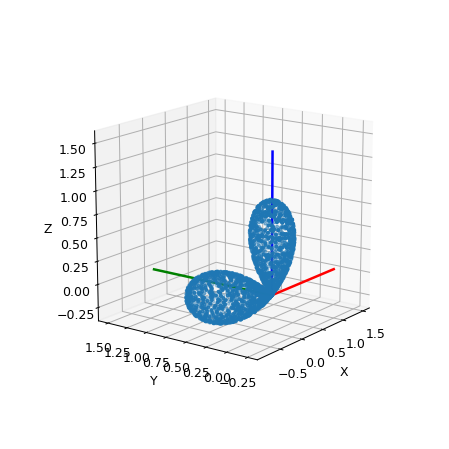

In [12]:
plot_interactive(samples, f_true)

# SH expansion (projection)

In [18]:
SHcoeffs = SH_project_polar_function(light_fn, samples)
print('{} coefficients'.format(SHcoeffs.shape))

(16,) coefficients


In [19]:
for l in range(n_bands):
    print('[{}]'.format(l+1))
    for m in np.arange(-l, l+1, 1):
        i = l*(l+1)+m
        print(' {:.6f}'.format(SHcoeffs[i]), end='')
    print()
print()

# for l in range(n_bands):
#     for m in np.arange(-l, l+1, 1):
#         i = l*(l+1)+m
#         print('[{}] (l={}, m={}) {}'.format(i,l, m, SHcoeffs[i]))
#     print()

[1]
 0.397715
[2]
 -0.210061 0.286049 0.281514
[3]
 -0.313446 0.000312 0.000644 -0.000902 0.093607
[4]
 -0.249076 0.000558 -0.012566 0.156455 -0.000106 -0.000625 -0.078426



# SH reconstruction

In [20]:
n_coeffs = (n_bands-1)*(n_bands-1 + 1)+n_bands
print(n_coeffs)
f_preds = np.zeros(len(samples)).astype(np.float32)
for sample_idx, sample in enumerate(samples):
    y_ml = sample.coeffs
    for i in range(len(y_ml)):
        f_preds[sample_idx] += SHcoeffs[i]*y_ml[i]
print(f_preds.shape)

16
(10000,)


0.0 0.99979484
-0.17860532 0.5759586


<IPython.core.display.Javascript object>


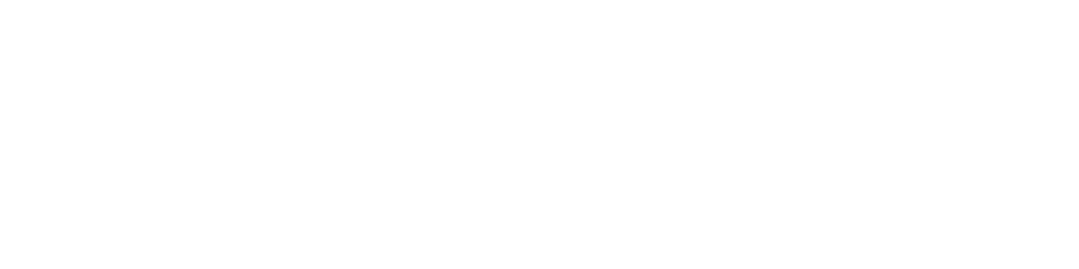

<IPython.core.display.Javascript object>


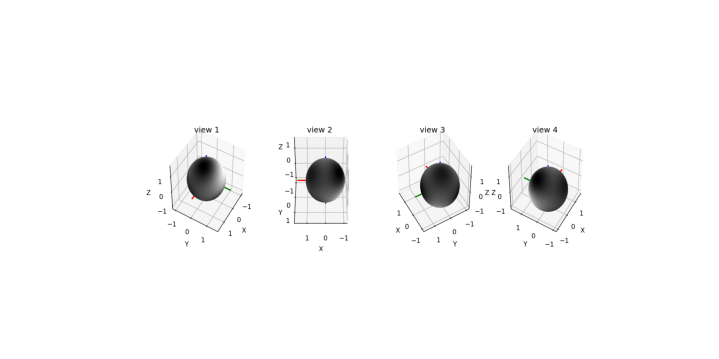

In [16]:
out_dir = './2_data/output/plots.png'
print(np.min(f_true), np.max(f_true))
print(np.min(f_preds), np.max(f_preds))
plot = plot_views(out_dir, 1, 4, vecs, f_preds)

<IPython.core.display.Javascript object>


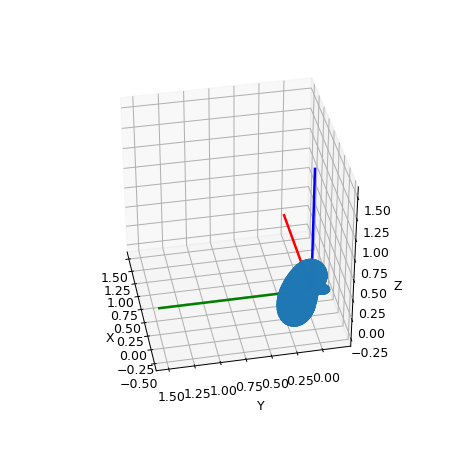

In [21]:
plot_interactive(samples, f_preds)